In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def read_data(data):
    """Read the data from the file."""
    return np.loadtxt(data)

lng = read_data('../pottscpp/lng_L12_q8.txt')

In [110]:
lng = lng[lng[:, 1] > 1]

In [111]:
beta_c = np.log(1 + np.sqrt(8))
print(beta_c)

1.342454046453526


Text(0, 0.5, 'log($\\Omega$(E))')

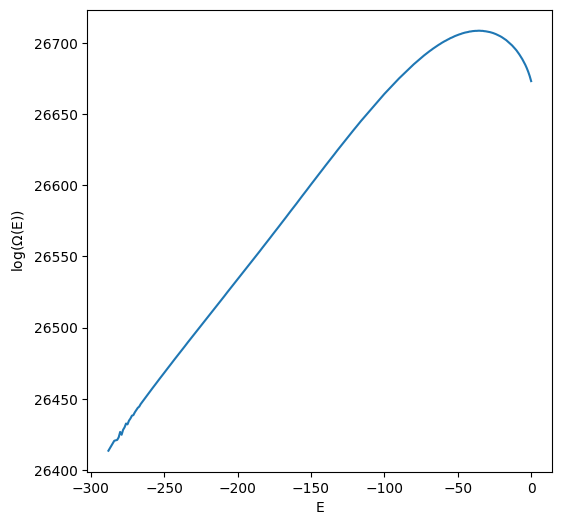

In [112]:
plt.figure(figsize=(6, 6))
plt.plot(lng[:, 0], lng[:, 1])
plt.xlabel('E')
plt.ylabel(r'log($\Omega$(E))')


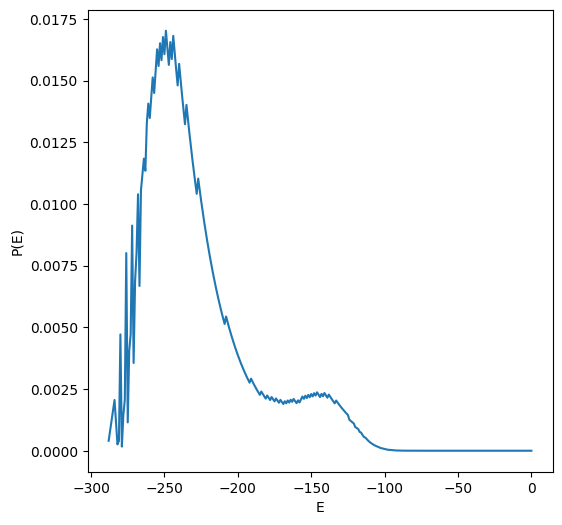

In [117]:

# Example inputs
ln_omega_E = lng[:, 1]
E_levels = lng[:, 0]  # Energy levels
beta = beta_c

# Compute log(Boltzmann weights)
ln_boltzmann_weights = ln_omega_E - beta * E_levels

# Use log-sum-exp trick to calculate ln(Z)
max_ln_weight = np.max(ln_boltzmann_weights)
ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

# Compute log(P(E)) and then P(E)
ln_P_E = ln_boltzmann_weights - ln_Z
P_E = np.exp(ln_P_E)  # Back to normal space if needed

plt.figure(figsize=(6, 6))
plt.plot(E_levels, P_E)
plt.xlabel('E')
plt.ylabel('P(E)')
plt.show()


In [114]:
def compute_P(beta, lng):
    ln_omega_E = lng[:, 1]
    E_levels = lng[:, 0]  # Energy levels
    beta = beta

    # Compute log(Boltzmann weights)
    ln_boltzmann_weights = ln_omega_E - beta * E_levels

    # Use log-sum-exp trick to calculate ln(Z)
    max_ln_weight = np.max(ln_boltzmann_weights)
    ln_Z = max_ln_weight + np.log(np.sum(np.exp(ln_boltzmann_weights - max_ln_weight)))

    # Compute log(P(E)) and then P(E)
    ln_P_E = ln_boltzmann_weights - ln_Z
    P_E = np.exp(ln_P_E)  # Back to normal space if needed

    return E_levels, P_E

In [115]:
def BinderCumulant(beta, lng):
    E_levels, P_E = compute_P(beta, lng)
    E2 = np.sum(E_levels**2 * P_E)
    E4 = np.sum(E_levels**4 * P_E)
    return 1 - E4 / (3 * E2**2)

In [116]:
BC = BinderCumulant(1, lng)
print(BC)
print(2/3)

0.6506227037228123
0.6666666666666666
